## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


## **get only normal data**

data = (X, Y)

In [3]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']



#data for information gain
Fuzzers_attacks_all = df[df['Fuzzers'] == 1]
Normal_Data_all = df[df['Label'] == 0]
frames_all = [Fuzzers_attacks_all, Normal_Data_all]
result_all = pd.concat(frames_all)
X_all = result_all.drop(labels=attack_labels, axis=1)
Y_all=result_all[['Fuzzers']]



## **Feature Selection Using Information Gain**

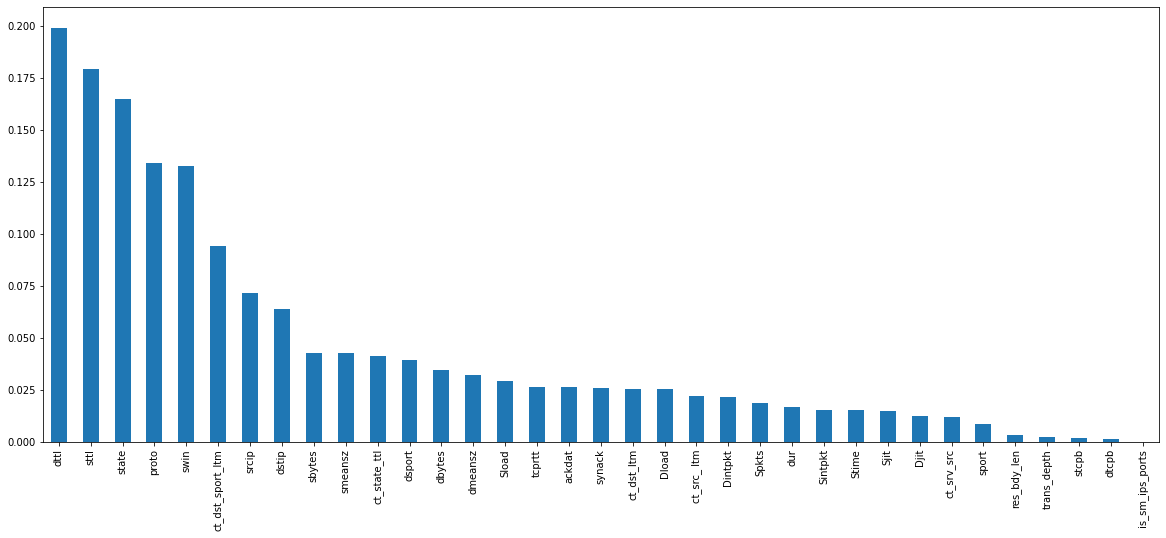

In [4]:
# #tutorial 3
# mutual information gain

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mutual_info = mutual_info_classif(X_all, Y_all[:]["Fuzzers"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_all.columns
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [5]:
# select top n features
n = 15
top_columns = SelectKBest(mutual_info_classif, k=n)
top_columns.fit(X_all, Y_all[:]["Fuzzers"])

SelectKBest(k=15, score_func=<function mutual_info_classif at 0x7f8f24dfcee0>)

In [6]:
top_columns.get_support()

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True])

In [7]:
X_all.columns[top_columns.get_support()]

Index(['srcip', 'dstip', 'dsport', 'proto', 'state', 'sbytes', 'dbytes',
       'sttl', 'dttl', 'Sload', 'swin', 'smeansz', 'dmeansz', 'ct_state_ttl',
       'ct_dst_sport_ltm'],
      dtype='object')

In [8]:
import numpy as np;
# Get the indices sorted by most important to least important
indices = np.argsort(top_columns.scores_)[::-1]

# To get your top 15 feature names
features = []
for i in range(n):
    features.append(X_all.columns[indices[i]])
features

['dttl',
 'sttl',
 'state',
 'proto',
 'swin',
 'ct_dst_sport_ltm',
 'srcip',
 'dstip',
 'sbytes',
 'smeansz',
 'ct_state_ttl',
 'dsport',
 'dbytes',
 'dmeansz',
 'Sload']

## **Writing seleted column names to a csv file**

file name: selected_columns.csv

In [9]:
#write appropriate columns to a csv file
#DOS
df=pd.read_csv('selected_columns_all.csv', sep=',', on_bad_lines='skip', index_col=False)
selected_columns =  list(X_all.columns[top_columns.get_support()])
# df = pd.DataFrame(selected_columns, columns =['DoS'])
df['Fuzzers'] = features
df.to_csv("selected_columns_all.csv", header=True, index=False)